To use apache spark on python, we use pyspark. Run the following command to install pyspark on google colab. (If using jupyter notebook, make sure to create a new environment before using !pip install pyspark command)

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.8 MB/s 
     |████████████████████████████████| 16.7 MB 46.9 MB/s 
     |████████████████████████████████| 6.3 MB 36.0 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 42.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=99a5cf676cb7796bd7d294f5f2ff53eddb5079907eacdcf07446225600421c4f
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
import pyspark
import pandas as pd

Lets read the csv file using pandas 
I have the csv file stored in my google drive, so we will mount the drive in colab and get location from there

In [ ]:
DataFrame = pd.read_csv('/content/drive/MyDrive/BigDataXspatial/Original_Dataset.csv')

In [ ]:
DataFrame = DataFrame.sample(100000).reset_index()

##Trial stuff

In [ ]:
pip install geopandas

In [ ]:
DataFrame.head()

,index,latitude,longitude,total_cars,cars_list,timestamp,geometry
0,5976043,32.096490,34.794880,1,[170],2020-02-22 06:03:02 UTC,POINT (34.79488 32.09649)
1,11123533,32.127629,34.831681,1,[30],2018-10-10 15:25:57 UTC,POINT (34.83168 32.12763)
2,804150,32.110910,34.836470,2,"[29, 168]",2019-11-09 10:39:02 UTC,POINT (34.83647 32.11091)
3,16519706,32.053980,34.805520,1,[132],2019-12-13 21:42:02 UTC,POINT (34.80552 32.05398)
4,11690984,32.079221,34.788357,0,[],2019-12-09 18:54:02 UTC,POINT (34.78836 32.07922)


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
telavivdf = pd.read_csv('/content/drive/MyDrive/BigDataXspatial/tel_aviv_neighborhood.csv')

In [ ]:
telavivdf.head()

,oid_shchuna,neighborhood_id,neighborhood_name,date_import,Shape_Area,area_polygon
0,1,3,Sde Dov area,2015-10-06 08:36:43 UTC,1.307955e+06,"POLYGON ((34.788389 32.123656, 34.788383 32.12..."
1,2,2,Spring Cliffs,2015-10-06 08:36:43 UTC,1.288925e+06,"POLYGON ((34.796243 32.130388, 34.795859 32.12..."
2,3,7,Ramat Aviv c,2015-10-06 08:36:43 UTC,1.101582e+06,"POLYGON ((34.808554 32.128712, 34.808641 32.12..."
3,4,11,Tel aviv university,2015-10-06 08:36:43 UTC,1.459851e+06,"POLYGON ((34.802354 32.118062, 34.80239 32.118..."
4,5,6,North Star,2015-10-06 08:36:43 UTC,4.212298e+05,"POLYGON ((34.783522 32.098636, 34.783493 32.09..."


In [ ]:
from shapely import wkt

In [ ]:
gpd_map = gpd.GeoDataFrame(DataFrame, geometry=gpd.points_from_xy(DataFrame.longitude, DataFrame.latitude))

In [ ]:
gpd_map.head()

,index,latitude,longitude,total_cars,cars_list,timestamp,geometry
0,5976043,32.096490,34.794880,1,[170],2020-02-22 06:03:02 UTC,POINT (34.79488 32.09649)
1,11123533,32.127629,34.831681,1,[30],2018-10-10 15:25:57 UTC,POINT (34.83168 32.12763)
2,804150,32.110910,34.836470,2,"[29, 168]",2019-11-09 10:39:02 UTC,POINT (34.83647 32.11091)
3,16519706,32.053980,34.805520,1,[132],2019-12-13 21:42:02 UTC,POINT (34.80552 32.05398)
4,11690984,32.079221,34.788357,0,[],2019-12-09 18:54:02 UTC,POINT (34.78836 32.07922)


In [ ]:
pip install geoplot

  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516296 sha256=7b30e979f976f1d1ac506eed7521dacf2c8d6ac050deb8b850cb90dbb49197d2
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
tel_aviv_map = gpd.read_file('/content/drive/MyDrive/BigDataXspatial/Tel_aviv.shp')

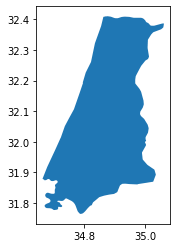

In [ ]:
tel_aviv_map.plot()

In [ ]:
import geoplot

In [ ]:
import geoplot.crs as gcrs

In [ ]:
import folium

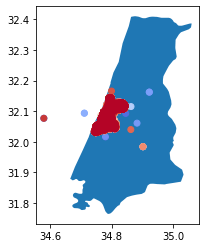

In [ ]:
ax = tel_aviv_map.plot()
gpd_map.plot(ax = ax, cmap='coolwarm')
plt.show()

In [ ]:
DataFrame[['longitude', 'latitude']] = DataFrame[['longitude', 'latitude']].round(3)
DataFrame['parking'] = '(' + DataFrame['latitude'].map(str) + ',' + DataFrame['longitude'].map(str) + ')'
print(DataFrame['parking'].nunique())

3066


In [ ]:
df_sub = DataFrame[DataFrame['total_cars']> 3].sort_values(['timestamp']).reset_index(drop=True)

In [ ]:
big_carparks = {}

for row in range(len(df_sub)):
    parking = df_sub['parking'][row]
    car_count = df_sub['total_cars'][row]
    if parking in big_carparks.keys():
        if car_count > big_carparks[parking]:
            big_carparks[parking] = car_count
    else:
        big_carparks[parking] = car_count

def color(number):
    if number == 6:
        return 'blue'
    elif number == 4:
        return 'green'
    elif number == 5:
        return 'orange'
    else:
        return 'red'
        
m = folium.Map([32.089, 34.797], zoom_start = 12, width = '40%')

for key in big_carparks.keys():
    key1, key2 = key.lstrip('(').strip(')').split(',')
    folium.Marker([key1,key2], popup = key, 
                  icon = folium.Icon(color = color(big_carparks[key]), prefix = 'fa')
                 ).add_to(m)

m

In [ ]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from meteostat import Point, Hourly

In [ ]:
def get_temp(lati, longi, time):
  location = Point(lati, longi)
  print(time)
  # print(time + datetime.timedelta(hours=1))  
  data = Hourly(location, time, time) #srat time and end time, hence two time
  data = data.fetch()
  return float(data['temp'][0])

In [ ]:
import random

In [ ]:
temp = []
for i in range(0,len(df_sub)):
  temp.append(random.randrange(10,40))

In [ ]:
df_sub['temp']=temp

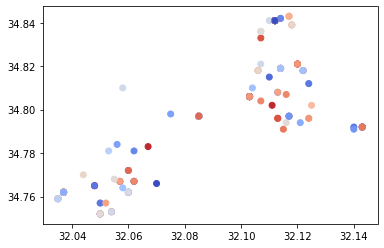

In [ ]:
x = df_sub.latitude
y = df_sub.longitude
plt.scatter(x, y, c = temp, cmap='coolwarm')
plt.show()

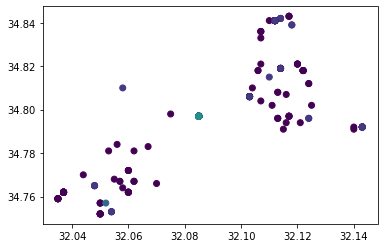

In [ ]:
x = df_sub.latitude
y = df_sub.longitude
plt.scatter(x, y, c = df_sub.total_cars, cmap='viridis')
plt.show()

To work with Spark we always need s spark session, so now we will create a spark session

# Working with pyspark

In [ ]:
from pyspark.sql import SparkSession

Here we will keep the session name as our team's name - 'BigShenenigans'

In [ ]:
spark = SparkSession.builder.appName('BigShenenigans').getOrCreate()

A spark session of name 'BigShenenigans' has been created

In [ ]:
spark

Now we will read a file in spark like we did for pandas

## Importing Data

In [ ]:
# df_spark = spark.read.csv('/content/drive/MyDrive/BigDataXspatial/Original_Dataset.csv')
# We want to make Latitude, longitude and all as our main column names instead of c0, c1 and all. So we will do the following
df_spark = spark.read.csv('/content/drive/MyDrive/BigDataXspatial/Original_Dataset.csv', header=True, inferSchema=True)

It takes a while to lead the csv file in the spark dataframe. (more than a min)

In [ ]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_spark.show(5)

+------------------+------------------+----------+---------+-------------------+
|          latitude|         longitude|total_cars|cars_list|          timestamp|
+------------------+------------------+----------+---------+-------------------+
|          32.09004|          34.79679|         1|    [138]|2020-02-25 10:48:02|
|          32.11614|          34.79464|         1|     [64]|2020-02-25 10:48:02|
|32.118759999999995|          34.82229|         1|    [120]|2020-02-25 10:48:02|
|          32.11226|34.837990000000005|         1|    [110]|2020-02-25 10:48:02|
|32.142790000000005|          34.79343|         1|    [190]|2020-02-25 10:48:02|
+------------------+------------------+----------+---------+-------------------+
only showing top 5 rows



In [ ]:
df_spark.head(5)

[Row(latitude=32.09004, longitude=34.79679, total_cars=1, cars_list='[138]', timestamp=datetime.datetime(2020, 2, 25, 10, 48, 2)),
 Row(latitude=32.11614, longitude=34.79464, total_cars=1, cars_list='[64]', timestamp=datetime.datetime(2020, 2, 25, 10, 48, 2)),
 Row(latitude=32.118759999999995, longitude=34.82229, total_cars=1, cars_list='[120]', timestamp=datetime.datetime(2020, 2, 25, 10, 48, 2)),
 Row(latitude=32.11226, longitude=34.837990000000005, total_cars=1, cars_list='[110]', timestamp=datetime.datetime(2020, 2, 25, 10, 48, 2)),
 Row(latitude=32.142790000000005, longitude=34.79343, total_cars=1, cars_list='[190]', timestamp=datetime.datetime(2020, 2, 25, 10, 48, 2))]

In [ ]:
df_spark.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- total_cars: integer (nullable = true)
 |-- cars_list: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)



## Select columns

In [ ]:
# Selecting only some particular columns
df_spark.select('latitude', 'longitude').show(5)

+------------------+------------------+
|          latitude|         longitude|
+------------------+------------------+
|          32.09004|          34.79679|
|          32.11614|          34.79464|
|32.118759999999995|          34.82229|
|          32.11226|34.837990000000005|
|32.142790000000005|          34.79343|
+------------------+------------------+
only showing top 5 rows



## Add columns

In [ ]:
# df_spark = df_spark.withColumn('New Columns Name', df_spark['total_cars']+2)
# After the New column name, you can have any function or any value that is related to that particular information of the row

## Drop columns

In [ ]:
# df_spark = df_spark.drop('Columns Name')

## Rename a column

In [ ]:
# df_spark = df_spark.withColumn('Old name', 'New name')

## Lets try to add a column 'weekday' in the table

In [ ]:
import datetime

In [ ]:
# In python, weekday 0 starts from Monday
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [ ]:
sample = datetime.datetime(2020, 2, 26, 10, 48, 2)
day[sample.weekday()]

'Wednesday'

In [ ]:
from pyspark.sql.functions import udf

In [ ]:
@udf
def get_weekday(sample):
  return day[sample.weekday()]

# If you don't want the full day name, remove day[] from return line

In [ ]:
get_weekday(datetime.datetime.today())

In [ ]:
df_spark_day = df_spark.withColumn('weekday', get_weekday(df_spark['timestamp']))

In [ ]:
df_spark_day.show(5)

+------------------+------------------+----------+---------+-------------------+-------+
|          latitude|         longitude|total_cars|cars_list|          timestamp|weekday|
+------------------+------------------+----------+---------+-------------------+-------+
|          32.09004|          34.79679|         1|    [138]|2020-02-25 10:48:02|Tuesday|
|          32.11614|          34.79464|         1|     [64]|2020-02-25 10:48:02|Tuesday|
|32.118759999999995|          34.82229|         1|    [120]|2020-02-25 10:48:02|Tuesday|
|          32.11226|34.837990000000005|         1|    [110]|2020-02-25 10:48:02|Tuesday|
|32.142790000000005|          34.79343|         1|    [190]|2020-02-25 10:48:02|Tuesday|
+------------------+------------------+----------+---------+-------------------+-------+
only showing top 5 rows



## Adding Average Temp information

In [ ]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from meteostat import Point, Hourly

In [ ]:
# from meteostat.interface.hourly import Hourly
# Import Meteostat library and dependencies
from meteostat import Point, Daily, Hourly

# Set time period
start = datetime(2018, 1, 1, 10, 0, 0)
end = datetime(2018, 1, 1, 11, 0, 0)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193)

# Get daily data for 2018
data = Hourly(vancouver, start, end)
data = data.fetch()

In [ ]:
data['temp'][0]

### Our part of code

In [ ]:
@udf
def get_temp(lati, longi, time):
  location = Point(lati, longi)
  print(time)
  print(time + datetime.timedelta(hours=1))  
  data = Hourly(location, time, time + datetime.timedelta(hours=1)) #srat time and end time, hence two time
  data = data.fetch()
  return float(data['temp'][0])

In [ ]:
get_temp(32.09004, 34.79679, datetime.datetime(2020, 2, 25, 10, 59, 1))

17.0

In [ ]:
df_spark_temp = df_spark_day.withColumn('temp', get_temp(df_spark['latitude'], df_spark['longitude'], df_spark['timestamp']))

In [ ]:
df_spark_temp.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- total_cars: integer (nullable = true)
 |-- cars_list: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- weekday: string (nullable = true)
 |-- temp: string (nullable = true)



In [ ]:
# df_spark_temp.select('temp').show()

Now that we have these information added, we will now try to remove some duplicated rows and clean the data (Add missing values and so on)

## Removing Null values

In [ ]:
df_spark_temp.na.drop()

DataFrame[latitude: double, longitude: double, total_cars: int, cars_list: string, timestamp: timestamp, weekday: string, temp: string]

In [ ]:
df_spark_temp.show()

+------------------+------------------+----------+----------+-------------------+-------+----+-------+
|          latitude|         longitude|total_cars| cars_list|          timestamp|weekday|temp|car_num|
+------------------+------------------+----------+----------+-------------------+-------+----+-------+
|          32.09004|          34.79679|         1|     [138]|2020-02-25 10:48:02|Tuesday|17.0|      1|
|          32.11614|          34.79464|         1|      [64]|2020-02-25 10:48:02|Tuesday|17.0|      1|
|32.118759999999995|          34.82229|         1|     [120]|2020-02-25 10:48:02|Tuesday|17.0|      1|
|          32.11226|34.837990000000005|         1|     [110]|2020-02-25 10:48:02|Tuesday|17.0|      1|
|32.142790000000005|          34.79343|         1|     [190]|2020-02-25 10:48:02|Tuesday|17.0|      1|
|32.089715000000005|34.779953000000006|         0|        []|2020-02-25 10:48:02|Tuesday|17.0|      0|
|         32.079074|         34.783401|         0|        []|2020-02-25 1

## Print locations which has more than a certain number of cars

In [ ]:
## Use the filter attribute
df_spark_temp.filter("total_cars>=5").select(['latitude', 'longitude', 'weekday', 'temp']).show()

+---------+---------+-------+----+
| latitude|longitude|weekday|temp|
+---------+---------+-------+----+
|  32.1034|  34.8059|Tuesday|17.0|
|  32.0849|  34.7966|Tuesday|16.9|
|  32.0849|  34.7966|Tuesday|37.9|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.9|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.9|
|  32.0849|  34.7966|Tuesday|37.9|
|32.111506|34.840876|Tuesday|37.9|
|32.111506|34.840876|Tuesday|38.0|
|  32.0849|  34.7966|Tuesday|37.9|
|  32.0849|  34.7966|Tuesday|37.9|
|32.111506|34.840876|Tuesday|37.9|
|  32.0849|  34.7966|Tuesday|37.0|
|  32.0849|  34.7966|Tuesday|37.9|
|32.111506|34.840876|Tuesday|37.9|
+---------+---------+-------+----+
only showing top 20 rows



# Select a certain temprature and see the total number of cars available, select a certain day and see the total number of cars available on that day

Grouping by weekday

In [ ]:
df_spark_temp.groupBy('weekday').sum('total_cars').show()

+---------+---------------+
|  weekday|sum(total_cars)|
+---------+---------------+
|  Tuesday|        1953032|
|   Friday|        1825056|
| Thursday|        1635504|
| Saturday|        1849621|
|   Monday|        2133532|
|   Sunday|        1603988|
|Wednesday|        1836809|
+---------+---------------+



From this above analysis we can say that On Wednesday, the availability of cars is lowest while on tuesday the availability of cars is highest

Grouping by location

In [ ]:
df_spark_temp.groupBy('latitude', 'longitude').sum('total_cars')

DataFrame[latitude: double, longitude: double, sum(total_cars): bigint]

Grouping by Temperature

In [ ]:
df_spark_temp.groupBy('temp').sum('total_cars')

DataFrame[temp: string, sum(total_cars): bigint]

## Predicting Total number of cars in a given location at a given day

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
featureAssembler = VectorAssembler(inputCols = ["latitude", "longitude"], outputCol="location")

In [ ]:
new_df_spark = featureAssembler.transform(df_spark_temp)